## Libraries

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.4 MB/s eta 0:00:00


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.1 MB/s eta 0:00:00


In [3]:
!pip install keras_nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 66.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm.auto import tqdm
import tqdm as notebook_tqdm
from datasets import load_dataset, load_metric, Dataset
from transformers import BertTokenizer
from transformers import TrainingArguments, Trainer
from transformers import DefaultDataCollator
from transformers import AutoTokenizer
from transformers import TFAutoModel
from transformers import AutoModelForSequenceClassification
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Get Data and create dataset

In [ ]:
import requests

# URL of the CSV file
url1 = "https://github.com/dml-qom/FarsTail/tree/master/data/Test-word.csv"
url2 = "https://github.com/dml-qom/FarsTail/tree/master/data/Train-word.csv"
url3 = "https://github.com/dml-qom/FarsTail/tree/master/data/Val-word.csv"

# Download the files
response1 = requests.get(url1)
response2 = requests.get(url2)
response3 = requests.get(url3)

# Save the files to local disk
with open("data/Test-word.csv", "wb") as file:
    file.write(response1.content)

with open("data/Train-word.csv", "wb") as file:
    file.write(response2.content)

with open("data/Val-word.csv", "wb") as file:
    file.write(response3.content)

### Load Data On system

In [2]:
train_data = pd.read_csv("data/Train-word.csv", sep='\t', on_bad_lines='skip')
val_data   = pd.read_csv("data/Val-word.csv", sep='\t',on_bad_lines='skip')
test_data  = pd.read_csv("data/Test-word.csv",  sep='\t', on_bad_lines='skip')

#### create dataset

In [3]:
from datasets import DatasetDict, concatenate_datasets

Train_dataset_dict = load_dataset('csv', data_files=['data/Train-word.csv'], delimiter="\t")
train_dataset = Train_dataset_dict['train']

Test_dataset_dict = load_dataset('csv', data_files=['data/Val-word.csv'], delimiter="\t")
test_dataset = Test_dataset_dict['train']

Val_dataset_dict = load_dataset('csv', data_files=['data/Test-word.csv'], delimiter="\t")
available_splits = list(Val_dataset_dict.keys())
val_dataset = Val_dataset_dict['train']

dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset,
})

Found cached dataset csv (/Users/fatemehnadi/.cache/huggingface/datasets/csv/default-f05b8e7649dd8b5a/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset csv (/Users/fatemehnadi/.cache/huggingface/datasets/csv/default-af99ebba0726a925/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset csv (/Users/fatemehnadi/.cache/huggingface/datasets/csv/default-df4dfe368fcfea4b/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

### Load Data On Colab

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('/content/drive/MyDrive/data/Train-word.csv', sep='\t')
val_data = pd.read_csv('/content/drive/MyDrive/data/Val-word.csv', sep='\t', )
test_data = pd.read_csv('/content/drive/MyDrive/data/Test-word.csv', sep='\t')

with np.load('/content/drive/MyDrive/data/Indexed-FarsTail.npz', allow_pickle=True) as f:
    train_ind, val_ind, test_ind, dictionary = f['train_ind'], f['val_ind'], f['test_ind'], f['dictionary'].item()

#### create dataset

In [8]:
from datasets import DatasetDict, concatenate_datasets

Train_dataset_dict = load_dataset('csv', data_files=['/content/drive/MyDrive/data/Train-word.csv'], delimiter="\t")
train_dataset = Train_dataset_dict['train']

Test_dataset_dict = load_dataset('csv', data_files=['/content/drive/MyDrive/data/Val-word.csv'], delimiter="\t")
test_dataset = Test_dataset_dict['train']

Val_dataset_dict = load_dataset('csv', data_files=['/content/drive/MyDrive/data/Test-word.csv'], delimiter="\t")
available_splits = list(Val_dataset_dict.keys())
val_dataset = Val_dataset_dict['train']

dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset,
})


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-9646574701226a29/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-6972c07330f81fb8/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-76edeae7f483ac3d/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 7266
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label', 'hard(hypothesis)', 'hard(overlap)'],
        num_rows: 1564
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 1537
    })
})

# Create subplots and some information

Train label
n    2448
e    2429
c    2389
Name: count, dtype: int64


Validation label
n    523
e    515
c    499
Name: count, dtype: int64


Test label
n    535
e    519
c    510
Name: count, dtype: int64




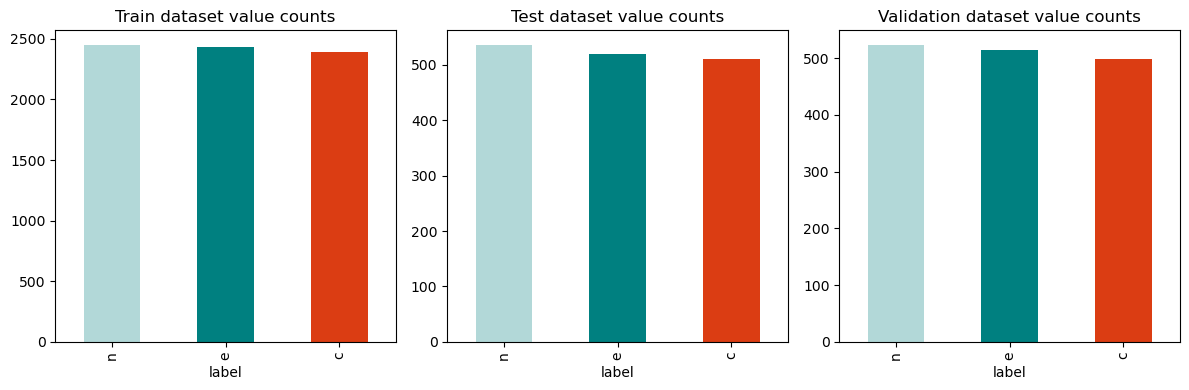

In [ ]:
import matplotlib.pyplot as plt

print("Train", train_data['label'].value_counts())
print("\n")
print("Validation", val_data['label'].value_counts())
print("\n")
print("Test", test_data['label'].value_counts())
print("\n")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

train_data['label'].value_counts().plot.bar(ax=axes[0], color=['#b2d8d8',"#008080", '#db3d13'])
axes[0].set_title("Train dataset value counts")


test_data['label'].value_counts().plot.bar(ax=axes[1], color=['#b2d8d8',"#008080", '#db3d13'])
axes[1].set_title("Test dataset value counts")

val_data['label'].value_counts().plot.bar(ax=axes[2], color=['#b2d8d8',"#008080", '#db3d13'])
axes[2].set_title("Validation dataset value counts")

plt.tight_layout()
plt.show()

In [ ]:
print("Train:")
print(train_data.info(), '\n\n')
print("Validation:")
print(val_data.info(), '\n\n')
print("Test:")
print(test_data.info(), '\n\n')

Train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7266 entries, 0 to 7265
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   premise     7266 non-null   object
 1   hypothesis  7266 non-null   object
 2   label       7266 non-null   object
dtypes: object(3)
memory usage: 170.4+ KB
None 


Validation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   premise     1537 non-null   object
 1   hypothesis  1537 non-null   object
 2   label       1537 non-null   object
dtypes: object(3)
memory usage: 36.1+ KB
None 


Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   premise           1564 non-null   object
 1   hypothesis     

In [ ]:
data_len = len(train_data) + len(val_data) + len(test_data)
train_percentage = len(train_data) / data_len
val_percentage = len(val_data) / data_len
test_percentage = len(test_data) / data_len

print(f"Train Data = {train_percentage:.2%}")
print(f"Validation Data = {val_percentage:.2%}")
print(f"Test Data = {test_percentage:.2%}")


Train Data = 70.09%
Validation Data = 14.83%
Test Data = 15.09%


Ensure that the data is balanced before moving on to the next step.

In [ ]:
train_data["label"].value_counts()

label
n    2448
e    2429
c    2389
Name: count, dtype: int64

Count number length of each sentences

In [ ]:
train_data['p_len'] = train_data['premise'].str.split().str.len()
train_data['h_len'] = train_data['hypothesis'].str.split().str.len()

val_data['p_len'] = val_data['premise'].str.split().str.len()
val_data['h_len'] = val_data['hypothesis'].str.split().str.len()

test_data['p_len'] = test_data['premise'].str.split().str.len()
test_data['h_len'] = test_data['hypothesis'].str.split().str.len()

In [ ]:

def sum_sta(df, name):
    bin_width = 50
    
    print("max length of premise for " + name, max(df["p_len"]))
    print("min length of premise for " + name, min(df["p_len"]))

    print("max length of hypothesis for " + name, max(df["h_len"]))
    print("min length of hypothesis for " + name, min(df["h_len"]))
    
    # Create a figure with two subplots
    _, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first bar plot in the first subplot
    axs[0].hist(df["p_len"])
    axs[0].set_title(name + " Data - premise")

    # Plot the second bar plot in the second subplot
    axs[1].hist(df["h_len"])
    axs[1].set_title(name + " Data - hypothesis")

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plots
    plt.show()


max length of premise for Train 116
min length of premise for Train 7
max length of hypothesis for Train 49
min length of hypothesis for Train 4


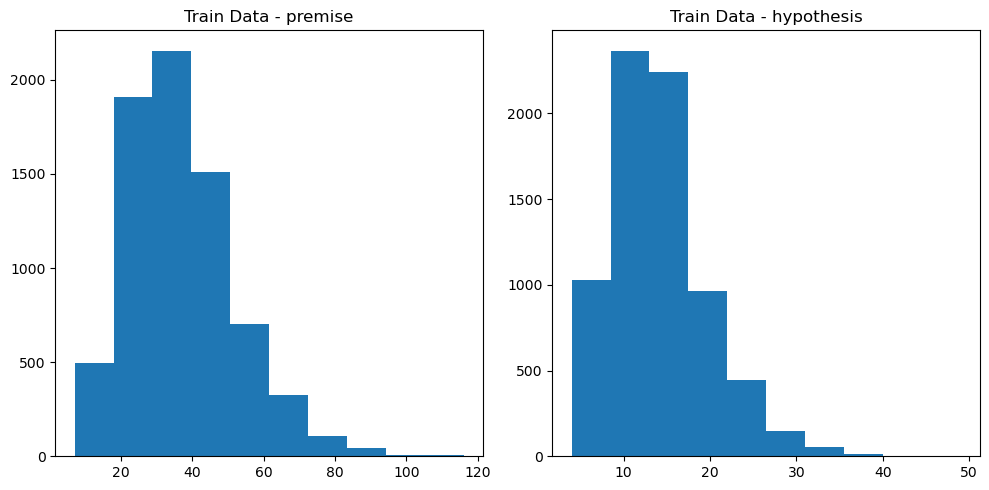

In [ ]:
sum_sta(train_data, "Train")

max length of premise for Validation 91
min length of premise for Validation 7
max length of hypothesis for Validation 39
min length of hypothesis for Validation 4


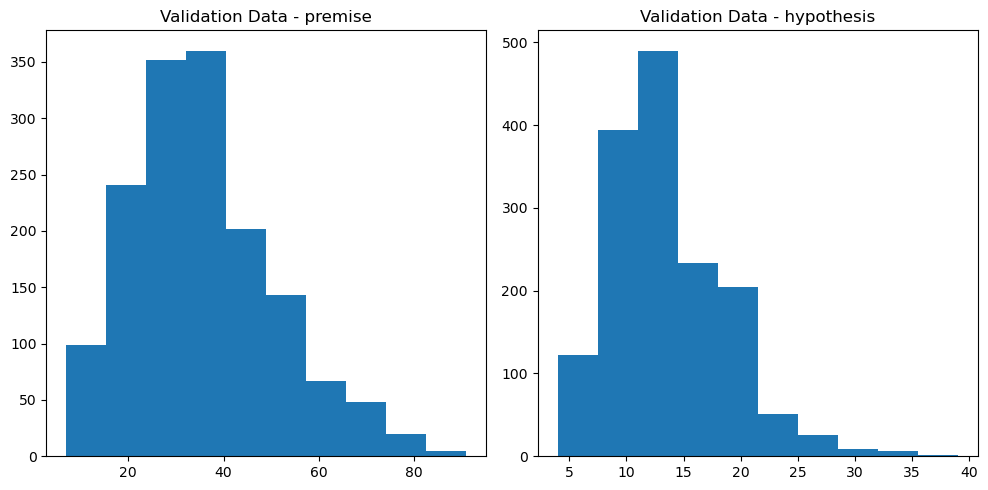

In [ ]:
sum_sta(val_data, "Validation")

max length of premise for Test 121
min length of premise for Test 8
max length of hypothesis for Test 48
min length of hypothesis for Test 4


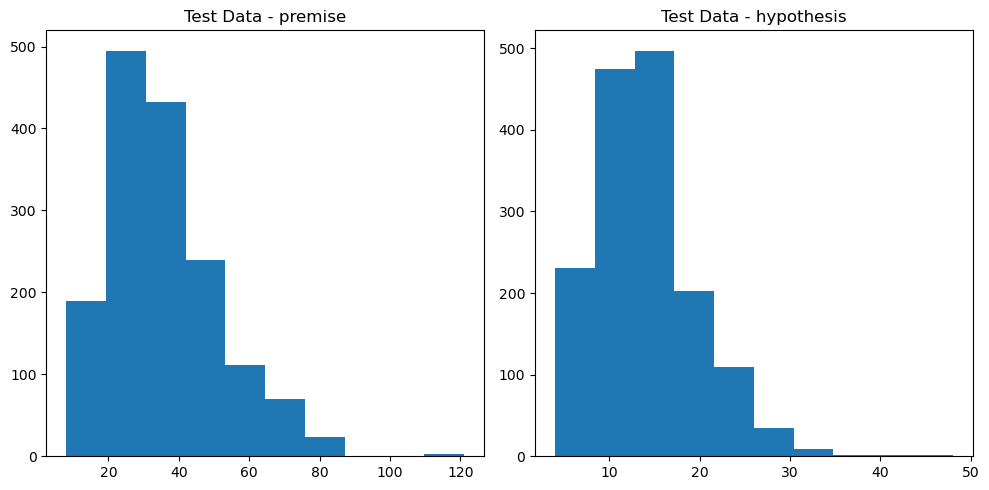

In [ ]:
sum_sta(test_data, "Test")

Reduce premise sentences with more than 69 to minimized sentences

In [ ]:
train_data = train_data.loc[train_data['p_len'] <= 69].reset_index(drop=True)
val_data   = val_data.loc[val_data['p_len'] <= 69].reset_index(drop=True)
test_data  = test_data.loc [test_data ['p_len'] <= 69].reset_index(drop=True)

# Preprocessing

In [ ]:
import hazm
import re

def text_preprocessing(txt):
    txt = txt.strip()
    normalizer = hazm.Normalizer()
    txt = normalizer.normalize(txt)
    extra_characters = re.compile("["
    u"\u200c"
    u"\u200d"
    u"\u2640-\u2642"
    u"\u2600-\u2B55"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\u3030"
    u"\ufe0f"
    u"\u2069"
    u"\u2066"
    u"\u2068"
    u"\u2067"
    "]+", flags=re.UNICODE)

    txt = extra_characters.sub(r'', txt)
    
    return txt

In [ ]:
train_data['cleaned_texts'] = (train_data['premise'] + train_data['hypothesis']).apply(text_preprocessing)
test_data['cleaned_texts'] = (test_data['premise'] + test_data['hypothesis']).apply(text_preprocessing)
val_data['cleaned_texts'] = (val_data['premise'] + val_data['hypothesis']).apply(text_preprocessing)

In [ ]:
print('premise: ' , train_data['premise'][23])
print('\nhypothesis: ' , train_data['hypothesis'][23])
print('\ncleaned texts (premise + hypothesis): ' , train_data['cleaned_texts'][23])

premise:  رخشندهٔ اعتصامی معروف به پروین اعتصامی (زادهٔ ۲۵ اسفند ۱۲۸۵ در تبریز – درگذشتهٔ ۱۵ فروردین ۱۳۲۰ در تهران) شاعر ایرانی است که به عنوان «مشهورترین شاعر زن ایران» از او یاد شده‌است.

hypothesis:  پروین از کودکی فارسی، انگلیسی و عربی را آموخت.

cleaned texts (premise + hypothesis):  رخشندهٔ اعتصامی معروف به پروین اعتصامی (زادهٔ ۲۵ اسفند ۱۲۸۵ در تبریز – درگذشتهٔ ۱۵ فروردین ۱۳۲۰ در تهران) شاعر ایرانی است که به عنوان «مشهورترین شاعر زن ایران» از او یاد شدهاست. پروین از کودکی فارسی، انگلیسی و عربی را آموخت.


Convert label

In [ ]:
lab_to_sentiment = {"c":0, "e":1, "n":2}

def label_decoder(label):
    return lab_to_sentiment[label]

train_data["target"] = train_data.label.apply(lambda x: label_decoder(x))
test_data["target"] = test_data.label.apply(lambda x: label_decoder(x))
val_data["target"] = val_data.label.apply(lambda x: label_decoder(x))

In [ ]:
y_train = np.array(train_data['target'], dtype=np.int32)
y_validation = np.array(val_data['target'], dtype=np.int32)
y_test = np.array(test_data['target'], dtype=np.int32)

# Task 1

Use ParsBert embeddings and transformer encoder with `keras`.
Two values are returned by the model: a sequence of embeddings, one for each input toke, and the `CLF` output. When a transformer encoder layer is used in a subsequent layer, the output sequence must be provided as input. An eight-head transformer layer with an intermediate dimension of 68 receives a sequence of vectors with a dimension of 768 from the Bert model. To indicate the input class, the output of this layer is passed to a Dense layer with 1024 neurons. To prevent overfitting, dense and refularization are also used. The first five layers of the model are `frozen`. Input and beret. During the process, only the transofrmer and dense layers are trained.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization

import keras_nlp
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
class Classifier:
    def __init__(self, dataset, model_checkpoint, train_column_name, test_column_name, preprocess = False, batch_size=128, seq_len=128):
        self.dataset = dataset
        self.dataset = self.dataset.filter(lambda record: record['label'] in ["c", "e", "n"])
        self.encoded_dict = {'c' : 0, 'e': 1, 'n': 2}
        self.seq_len = seq_len
        self.model_checkpoint = model_checkpoint
        self.train_column_name = train_column_name
        self.test_column_name = test_column_name
        self.batch_size = batch_size
        self.preprocess = preprocess
        self.prepare_data()
        self.set_model_and_tokenizer()

    def encode_classes(self, df):
        return df.label.map(self.encoded_dict)

    def prepare_data(self):
        self.train_df = pd.DataFrame(self.dataset['train'])
        self.valid_df = pd.DataFrame(self.dataset['validation'])
        self.test_df = pd.DataFrame(self.dataset['test'])
        self.train_df['label'] = self.encode_classes(self.train_df)
        self.valid_df['label'] = self.encode_classes(self.valid_df)
        self.test_df['label'] = self.encode_classes(self.test_df)  
        if self.preprocess:
            self.train_df = self.clean_data(self.train_df)
            self.valid_df = self.clean_data(self.valid_df)
            self.test_df = self.clean_data(self.test_df)


    def set_model_and_tokenizer(self):
        
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_checkpoint)
        self.bert = TFAutoModel.from_pretrained(self.model_checkpoint)
        
    def get_tokenized_ids(self, df, column_name):
        record_len = len(df)
        input_ids = np.zeros((record_len, self.seq_len))
        mask_ids = np.zeros((record_len, self.seq_len))

        for i, row in df.iterrows():
            input_data = row['premise'], row['hypothesis']
            tokens = self.tokenizer.encode_plus(input_data, max_length=self.seq_len, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
            input_ids[i, :] = tokens['input_ids']
            mask_ids[i, :] = tokens['attention_mask']

        class_values = df['label'].values
        labels = np.zeros((record_len, class_values.max()+1))

        # one hot
        labels[np.arange(record_len), class_values] = 1 
        return input_ids, mask_ids, labels

    def dataset_mapper(self, input_ids, masks, labels):
        return {'input_ids': input_ids, 'attention_mask': masks}, labels

    def get_dataset(self, df, column_name):
        input_ids, mask_ids, labels = self.get_tokenized_ids(df, column_name)
        dataset = tf.data.Dataset.from_tensor_slices((input_ids, mask_ids, labels))
        dataset = dataset.map(self.dataset_mapper)
        return dataset.batch(self.batch_size, drop_remainder=True)

    def create_model(self):
        
        #Input layers
        input_ids = tf.keras.layers.Input(shape=(128,), name='input_ids', dtype='int64')
        mask = tf.keras.layers.Input(shape=(128,), name='attention_mask', dtype='int64')
        
        #BERT Layer
        embeddings = self.bert(input_ids, attention_mask=mask)[0] #.pooler_output
    
        
        #Transformer Encoder
        encoder = keras_nlp.layers.TransformerEncoder(intermediate_dim=68, num_heads=8)(embeddings)

        pooler_output = encoder[:, 0, :]
        dense = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.003))(pooler_output)
        drop_output = tf.keras.layers.Dropout(0.6)(dense)

        output = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(drop_output)
        
        #build and compile the model
        model = tf.keras.Model(inputs=[input_ids, mask], outputs=output)
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
        
        loss = tf.keras.losses.CategoricalCrossentropy()
        acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
        
        model.compile(optimizer=optimizer, loss=loss, metrics=[acc])
        
        #Freeze pretrained BERT model
        for layer in model.layers[:3]:
          layer.trainable = False

        print(model.summary())
        return model

    def train_and_evaluate_model(self, model):
        train_dataset = self.get_dataset(self.train_df, self.train_column_name)
        valid_dataset = self.get_dataset(self.valid_df, self.train_column_name)
        input_ids_test, mask_ids_test, labels_test = self.get_tokenized_ids(self.test_df, self.test_column_name)
        history = model.fit(train_dataset, validation_data=valid_dataset, epochs=4)
        score = model.evaluate([input_ids_test, mask_ids_test], labels_test, verbose=0)
        predictions = np.argmax(model.predict([input_ids_test, mask_ids_test]), axis=1)
        self.print_results(score, predictions, self.test_df['label'])
        self.plot_results(history)
        self.print_confusion_matrix(self.test_df['label'].to_list(), predictions)
        return model, history, score, predictions

    def clean_text(self, text):
        lemmatizer = WordNetLemmatizer()
        tokens = nltk.word_tokenize(text)
        tokens = [word.lower() for word in tokens]
        tokens = [word for word in tokens if not word in nltk_stopwords.words("english")]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return tokens
    

    def clean_data(self, df):
        for i, row in df.iterrows():
            row['premise'] =  self.clean_text(row['premise'])
            row['hypothesis'] =  self.clean_text(row['hypothesis'])
        return df

    def plot_results(self, history):
        plt.style.use('seaborn')
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_figheight(4)
        fig.set_figwidth(12)
      
        ax1.plot(history.history["accuracy"], label = "Train")
        ax1.plot(history.history["val_accuracy"], label ="Validation")
        ax1.set_ylabel("Accuracy")
        ax1.set_xlabel("Epoch")
        ax1.legend()

        ax2.plot(history.history["loss"], label = "Train")
        ax2.plot(history.history["val_loss"], label = "Validation")
        ax2.set_ylabel("Loss")
        ax2.set_xlabel("Epoch")
        ax2.legend()

        fig.suptitle(f"Results for {self.model_checkpoint} Model", y=1.05)
        plt.tight_layout()
        plt.show()

    def print_confusion_matrix(self, y_test, y_pred):
        conf_mat = confusion_matrix(y_test, y_pred)
        ax = plt.subplot()
        sns.heatmap(conf_mat, annot = True, ax = ax, linewidths = 5, linecolor = 'y', center = 0)
        ax.set_title(f"Confusion Matrix for {self.model_checkpoint} Model")
        ax.set_xlabel('Predicted Labels') 
        ax.set_ylabel('True Labels')
        ax.xaxis.set_ticklabels(['Contradiction', 'Entailment', 'Neutral'])
        ax.yaxis.set_ticklabels(['Contradiction', 'Entailment', 'Neutral'])
        plt.show()

    def print_results(self, score, predictions, true_labels):
        print("Loss on test data:", score[0])
        print("Accuracy on test data:", score[1])
        print("Classification Report:")
        print(classification_report(true_labels, predictions, target_names=['c', 'e', 'n']))
        for i, classification in enumerate(['Contradiction', 'Entailment', 'Neutral']):
            fpr, tpr, thresholds = metrics.roc_curve(np.array(true_labels.to_list()), np.array(predictions), pos_label=i)
            auc_res = metrics.auc(fpr, tpr)
            print(f"AUC - {classification}: ", auc_res)

In [ ]:
classifier_ParsBert = Classifier(dataset,'HooshvareLab/bert-base-parsbert-uncased',\
                                 '', '', True,  batch_size=8 , seq_len=128)

Some layers from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  162841344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

<ipython-input-15-5df74693336c>:126: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


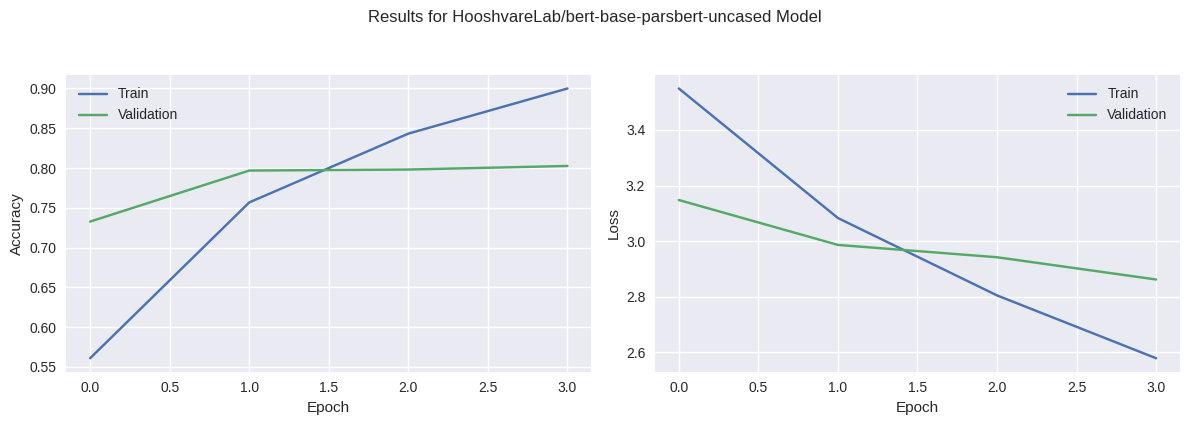

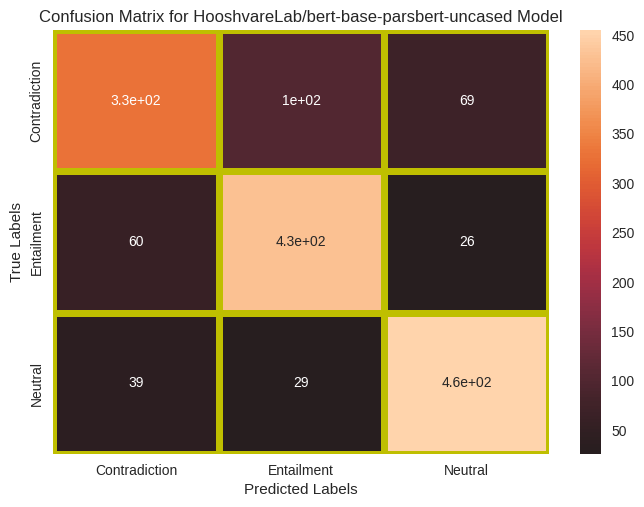

In [ ]:
part1_model = classifier_ParsBert.create_model()
part1_model, part1_history, part1_score, part1_predictions = classifier_ParsBert.train_and_evaluate_model(part1_model)

It was observed in the test report and confusion matrix that the contradiction and neutral classes can be predicted more accurately than the entailmen class.

### Task 2

A transformer encoder is not added to this model, and the Bert model can be trained, so it can learn a specific task.

In [ ]:
class Classifier:
    def __init__(self, dataset, model_checkpoint, train_column_name, test_column_name, preprocess = False, batch_size=128, seq_len=128):
        self.dataset = dataset
        self.dataset = self.dataset.filter(lambda record: record['label'] in ["c", "e", "n"])
        self.encoded_dict = {'c' : 0, 'e': 1, 'n': 2}
        self.seq_len = seq_len
        self.model_checkpoint = model_checkpoint
        self.train_column_name = train_column_name
        self.test_column_name = test_column_name
        self.batch_size = batch_size
        self.preprocess = preprocess
        self.prepare_data()
        self.set_model_and_tokenizer()

    def encode_classes(self, df):
        return df.label.map(self.encoded_dict)

    def prepare_data(self):
        self.train_df = pd.DataFrame(self.dataset['train'])
        self.valid_df = pd.DataFrame(self.dataset['validation'])
        self.test_df = pd.DataFrame(self.dataset['test'])
        self.train_df['label'] = self.encode_classes(self.train_df)
        self.valid_df['label'] = self.encode_classes(self.valid_df)
        self.test_df['label'] = self.encode_classes(self.test_df)  
        if self.preprocess:
            self.train_df = self.clean_data(self.train_df)
            self.valid_df = self.clean_data(self.valid_df)
            self.test_df = self.clean_data(self.test_df)


    def set_model_and_tokenizer(self):
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_checkpoint)
        self.bert = TFAutoModel.from_pretrained(self.model_checkpoint)
        

    def get_tokenized_ids(self, df, column_name):
        record_len = len(df)
        input_ids = np.zeros((record_len, self.seq_len))
        mask_ids = np.zeros((record_len, self.seq_len))

        for i, row in df.iterrows():
            input_data = row['premise'], row['hypothesis']
            tokens = self.tokenizer.encode_plus(input_data, max_length=self.seq_len, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
            input_ids[i, :] = tokens['input_ids']
            mask_ids[i, :] = tokens['attention_mask']

        class_values = df['label'].values
        labels = np.zeros((record_len, class_values.max()+1))
        labels[np.arange(record_len), class_values] = 1
        return input_ids, mask_ids, labels

    def dataset_mapper(self, input_ids, masks, labels):
        return {'input_ids': input_ids, 'attention_mask': masks}, labels

    def get_dataset(self, df, column_name):
        input_ids, mask_ids, labels = self.get_tokenized_ids(df, column_name)
        dataset = tf.data.Dataset.from_tensor_slices((input_ids, mask_ids, labels))
        dataset = dataset.map(self.dataset_mapper)
        return dataset.batch(self.batch_size, drop_remainder=True)

    def create_model(self):
        
        #Input layers
        input_ids = tf.keras.layers.Input(shape=(128,), name='input_ids', dtype='int64')
        mask = tf.keras.layers.Input(shape=(128,), name='attention_mask', dtype='int64')
        
        
        #BERT Layer
        embeddings = self.bert(input_ids, attention_mask=mask)[1]
    

        dense = tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.003))(embeddings)
        drop_output = tf.keras.layers.Dropout(0.6)(dense)
        output = tf.keras.layers.Dense(3, activation='softmax', name='outputs')(drop_output)
        
        #build and compile the model
        model = tf.keras.Model(inputs=[input_ids, mask], outputs=output)
        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
        
        loss = tf.keras.losses.CategoricalCrossentropy()
        acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
        
        model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

        model.layers[2].trainable = True

        print(model.summary())
        return model

    def train_and_evaluate_model(self, model):
        train_dataset = self.get_dataset(self.train_df, self.train_column_name)
        valid_dataset = self.get_dataset(self.valid_df, self.train_column_name)
        input_ids_test, mask_ids_test, labels_test = self.get_tokenized_ids(self.test_df, self.test_column_name)
        history = model.fit(train_dataset, validation_data=valid_dataset, epochs=5)
        score = model.evaluate([input_ids_test, mask_ids_test], labels_test, verbose=0)
        predictions = np.argmax(model.predict([input_ids_test, mask_ids_test]), axis=1)
        self.print_results(score, predictions, self.test_df['label'])
        self.plot_results(history)
        self.print_confusion_matrix(self.test_df['label'].to_list(), predictions)
        return model, history, score, predictions

    def clean_text(self, text):
        lemmatizer = WordNetLemmatizer()
        tokens = nltk.word_tokenize(text)
        tokens = [word.lower() for word in tokens]
        tokens = [word for word in tokens if not word in nltk_stopwords.words("english")]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return tokens
    

    def clean_data(self, df):
        for i, row in df.iterrows():
            row['premise'] =  self.clean_text(row['premise'])
            row['hypothesis'] =  self.clean_text(row['hypothesis'])
        return df

    def plot_results(self, history):
        plt.style.use('seaborn')
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_figheight(4)
        fig.set_figwidth(12)
      
        ax1.plot(history.history["accuracy"], label = "Train")
        ax1.plot(history.history["val_accuracy"], label ="Validation")
        ax1.set_ylabel("Accuracy")
        ax1.set_xlabel("Epoch")
        ax1.legend()

        ax2.plot(history.history["loss"], label = "Train")
        ax2.plot(history.history["val_loss"], label = "Validation")
        ax2.set_ylabel("Loss")
        ax2.set_xlabel("Epoch")
        ax2.legend()

        fig.suptitle(f"Results for {self.model_checkpoint} Model", fontsize="x-large", y=1.05)
        plt.tight_layout()
        plt.show()

    def print_confusion_matrix(self, y_test, y_pred):
        conf_mat = confusion_matrix(y_test, y_pred)
        ax = plt.subplot()
        sns.heatmap(conf_mat, annot = True, ax = ax, linewidths = 5, linecolor = 'y', center = 0)
        ax.set_title(f"Confusion Matrix for {self.model_checkpoint} Model")
        ax.set_xlabel('Predicted Labels') 
        ax.set_ylabel('True Labels')
        ax.xaxis.set_ticklabels(['Contradiction', 'Entailment', 'Neutral'])
        ax.yaxis.set_ticklabels(['Contradiction', 'Entailment', 'Neutral'])
        plt.show()

    def print_results(self, score, predictions, true_labels):
        print("Loss on test data:", score[0])
        print("Accuracy on test data:", score[1])
        print("Classification Report:")
        print(classification_report(true_labels, predictions, target_names=['c', 'e', 'n']))
        for i, classification in enumerate(['Contradiction', 'Entailment', 'Neutral']):
            fpr, tpr, thresholds = metrics.roc_curve(np.array(true_labels.to_list()), np.array(predictions), pos_label=i)
            auc_res = metrics.auc(fpr, tpr)
            print(f"AUC - {classification}: ", auc_res)

In [ ]:
classifier_ParsBert = Classifier(dataset,'HooshvareLab/bert-base-parsbert-uncased',\
                                 '', '', True,  batch_size=8 , seq_len=128)


Some layers from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_2 (TFBertModel)  TFBaseModelOutputWi  162841344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

<ipython-input-20-81810bd6549a>:118: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


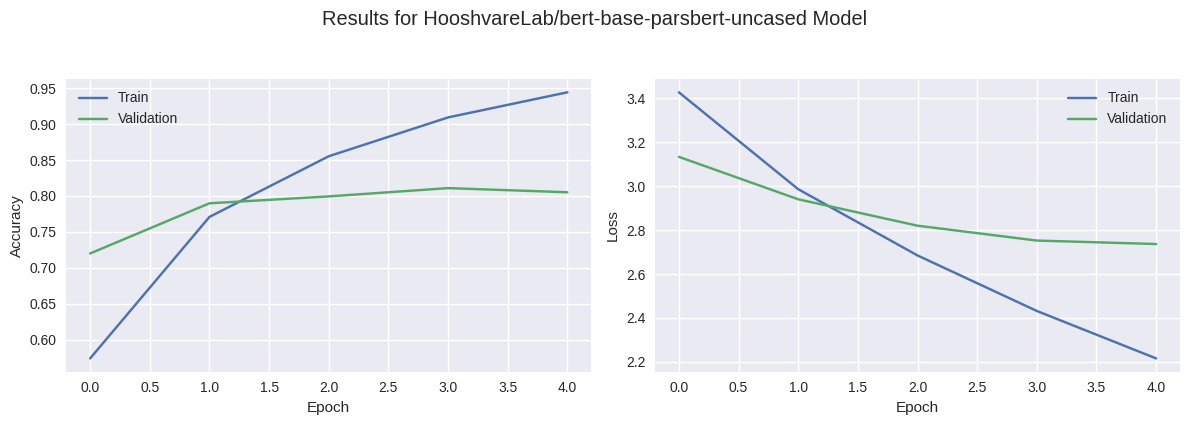

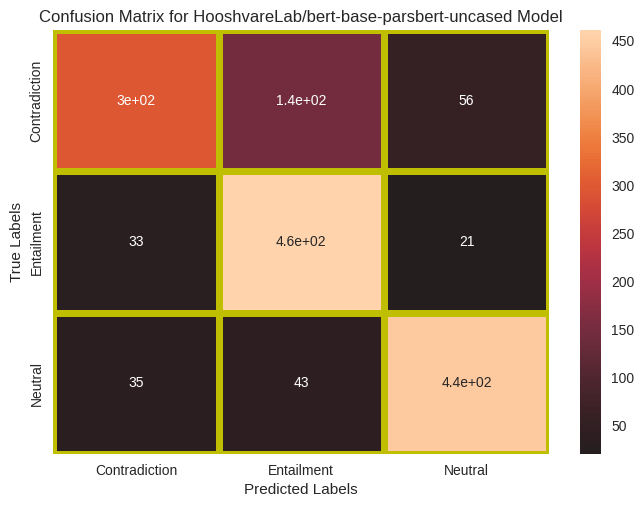

In [ ]:
part2_model = classifier_ParsBert.create_model()
part2_model, part2_history, part2_score, part2_predictions = classifier_ParsBert.train_and_evaluate_model(part2_model)

Because we train model 2 in more than one epoch, I think overfitting accuracy or model need more than epochs. Both results are close to each other at all

### Task 3

In [11]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

from transformers import AutoTokenizer
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, TensorDataset, DataLoader



cuda:0


In [12]:
class NLIDataset(Dataset):

    def __init__(self, train_df, val_df, test_df, model_name):

        self.model_name = model_name
        
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_dict = {'c': 0, 'e': 1, 'n': 2}
        self.dataset = dataset
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

        self.train_data = None
        self.val_data   = None
        self.test_data  = None

        self.prepare_data()

    
    def prepare_data(self):
      
        self.train_data = self.load_data(self.train_df)
        self.val_data = self.load_data(self.val_df)
        self.test_data = self.load_data(self.test_df)

        

    def load_data(self, df):
        token_ids = []
        mask_ids = []
        y = []

        premise_list = df['premise'].to_list()
        hypothesis_list = df['hypothesis'].to_list()
        label_list = df['label'].to_list()

        for (premise, hypothesis, label) in zip(premise_list, hypothesis_list, label_list):
            p_tokens = self.tokenizer.encode(premise, add_special_tokens = False)
            h_tokens = self.tokenizer.encode(hypothesis, add_special_tokens = False)
            tokens = [self.tokenizer.cls_token_id] + p_tokens + [self.tokenizer.sep_token_id] + h_tokens + [self.tokenizer.sep_token_id]
            p_len = len(p_tokens)
            h_len = len(h_tokens)

            attention_mask_ids = torch.tensor([1] * (p_len + h_len + 3)) 

            token_ids.append(torch.tensor(tokens))
            mask_ids.append(attention_mask_ids)
            y.append(self.label_dict[label])

        token_ids = pad_sequence(token_ids, batch_first=True)
        mask_ids = pad_sequence(mask_ids, batch_first=True)
        y = torch.tensor(y)
        dataset = TensorDataset(token_ids, mask_ids, y)
        print(len(dataset))
        return dataset

    def get_data_loaders(self, batch_size=8, shuffle=True):
        train_loader = DataLoader(
          self.train_data,
          shuffle=shuffle,
          batch_size=batch_size
        )

        val_loader = DataLoader(
          self.val_data,
          shuffle=shuffle,
          batch_size=batch_size
        )
        test_loader = DataLoader(
          self.test_data,
          shuffle=shuffle,
          batch_size=batch_size
        )

        return train_loader, val_loader, test_loader


In [13]:
model_name = 'HooshvareLab/bert-base-parsbert-uncased'
parsbert_dataset = NLIDataset(train_data, val_data, test_data, model_name)

7266
1537
1564


In [14]:
train_loader, valid_loader, test_loader = parsbert_dataset.get_data_loaders(batch_size=8)

In [15]:
import torch.nn as nn
import copy

def deleteEncodingLayers(model, num_layers_to_keep):  # must pass in the full bert model
    oldModuleList = model.bert.encoder.layer
    newModuleList = nn.ModuleList()

    # Now iterate over all layers, only keepign only the relevant layers.
    for i in range(0, len(num_layers_to_keep)):
        newModuleList.append(oldModuleList[i])

    # create a copy of the model, modify it with the new list, and return
    copyOfModel = copy.deepcopy(model)
    copyOfModel.bert.encoder.layer = newModuleList

    return copyOfModel

In [16]:
from transformers import AutoModelForSequenceClassification
from transformers import AdamW


def model_optimizer(model_name):
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
    model = model.to(device)
    
    list_parameter_opt = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    grouped_parameters_opt = [
        {'params': [p for n, p in list_parameter_opt if not any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.01},
        {'params': [p for n, p in list_parameter_opt if any(nd in n for nd in no_decay)],
        'weight_decay_rate': 0.0}]

    optimizer = AdamW(grouped_parameters_opt, lr=2e-5, correct_bias=False)

    return model, optimizer


In [17]:
def calc_acc(y_pred, y_test):
    acc = (torch.log_softmax(y_pred, dim=1).argmax(dim=1) == y_test).sum().float() / float(y_test.size(0))
    return acc


In [18]:
def train(model, train_loader, val_loader, optimizer, ep):

    best_acc=0.0
    total_step = len(train_loader)

    for epoch in range(ep):

        # Train Phase:

        model.train()
        total_train_loss = 0
        total_train_acc  = 0
        for batch_idx, (token_ids, mask_ids, y) in enumerate(train_loader):
            optimizer.zero_grad()
            token_ids = token_ids.to(device)
            mask_ids = mask_ids.to(device)
            labels = y.to(device)
            loss, prediction = model(token_ids, attention_mask=mask_ids, labels=labels).values()

            acc = calc_acc(prediction, labels)

            loss.backward()
            optimizer.step()
            
            total_train_loss += loss.item()
            total_train_acc  += acc.item()

        train_acc  = 100*total_train_acc/len(train_loader)
        train_loss = total_train_loss/len(train_loader)
        
        # Eval Phase

        model.eval()
        total_val_acc  = 0
        total_val_loss = 0

        with torch.no_grad():
            for batch_idx, (pair_token_ids, mask_ids, y) in enumerate(val_loader):
                optimizer.zero_grad()
                pair_token_ids = pair_token_ids.to(device)
                mask_ids = mask_ids.to(device)
                labels = y.to(device)

                loss, prediction = model(pair_token_ids, attention_mask=mask_ids, labels=labels).values()
                
                acc = calc_acc(prediction, labels)

                total_val_loss += loss.item()
                total_val_acc  += acc.item()

        val_acc  = 100* total_val_acc/len(val_loader)
        val_loss = total_val_loss/len(val_loader)

        if val_acc > best_acc: 
            torch.save(model, '/content/drive/MyDrive/data/model/model3.pth')
            best_acc = val_acc 

        print(f'Epoch {epoch+1}:\n train_loss: {train_loss:.2f}  val_loss: {val_loss:.2f} \n train_acc : {train_acc:.1f}  val_acc : {val_acc:.1f} \n')

In [19]:
def test(): 
    
    model = torch.load('/content/drive/MyDrive/data/model/model3.pth')
    model.eval()
     
    total_test_acc = 0 
    total_test_loss = 0
 
    with torch.no_grad():
        for batch_idx, (pair_token_ids, mask_ids, y) in enumerate(test_loader):
                optimizer.zero_grad()
                pair_token_ids = pair_token_ids.to(device)
                mask_ids = mask_ids.to(device)
                labels = y.to(device)

                loss, prediction = model(pair_token_ids, attention_mask=mask_ids, labels=labels).values()
                
                acc = calc_acc(prediction, labels)

                total_test_loss += loss.item()
                total_test_acc  += acc.item()

    test_acc  = 100*total_test_acc/len(test_loader)
    test_loss = total_test_loss/len(test_loader) 
 
    print(f'Test Set Accuracy: % {test_acc:.1f}')
    return test_acc

In [20]:
model12, optimizer = model_optimizer(model_name)

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassifica

In [21]:
train(model12, train_loader, valid_loader, optimizer, ep=4)

Epoch 1:
 train_loss: 0.82  val_loss: 0.66 
 train_acc : 61.5  val_acc : 72.3 

Epoch 2:
 train_loss: 0.46  val_loss: 0.54 
 train_acc : 81.0  val_acc : 79.9 

Epoch 3:
 train_loss: 0.27  val_loss: 0.59 
 train_acc : 89.2  val_acc : 79.7 

Epoch 4:
 train_loss: 0.18  val_loss: 0.65 
 train_acc : 93.2  val_acc : 78.8 



In [ ]:
test_acc_12 = test()

In [ ]:
import logging
import warnings
logging.getLogger("transformers").setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

Each iteration removes one layer and reports accuracy in three epochs

In [ ]:
layer_list =  [0,1,2,3,4,5,6,7,8,9,10,11]
test_acc_list = []
for i in range(12):
  print("---------------PARSBERT----------------")
  print("Number of layer " + str(len(layer_list)))
  model, optimizer = model_optimizer(model_name)
  model = deleteEncodingLayers(model, layer_list)
  train(model, train_loader, valid_loader, optimizer, ep=2)
  test_acc = test()
  test_acc_list.append(test_acc)
  layer_list = layer_list[:-1]
  print("\n")

---------------PARSBERT----------------
Number of layer 12


Epoch 1:
 train_loss: 0.81  val_loss: 0.61 
 train_acc : 61.5  val_acc : 73.6 

Epoch 2:
 train_loss: 0.48  val_loss: 0.57 
 train_acc : 80.3  val_acc : 78.0 

Test Set Accuracy: % 79.4


---------------PARSBERT----------------
Number of layer 11
Epoch 1:
 train_loss: 0.88  val_loss: 0.68 
 train_acc : 55.4  val_acc : 70.4 

Epoch 2:
 train_loss: 0.57  val_loss: 0.65 
 train_acc : 75.3  val_acc : 75.4 

Test Set Accuracy: % 74.7


---------------PARSBERT----------------
Number of layer 10
Epoch 1:
 train_loss: 1.11  val_loss: 1.10 
 train_acc : 34.6  val_acc : 32.5 

Epoch 2:
 train_loss: 1.11  val_loss: 1.10 
 train_acc : 32.2  val_acc : 33.5 

Test Set Accuracy: % 33.1


---------------PARSBERT----------------
Number of layer 9
Epoch 1:
 train_loss: 0.78  val_loss: 0.58 
 train_acc : 63.9  val_acc : 75.0 

Epoch 2:
 train_loss: 0.44  val_loss: 0.55 
 train_acc : 82.0  val_acc : 77.8 

Test Set Accuracy: % 79.4


---------------PARSBERT----------------
Number of layer 8
Epoch 1:
 trai

In [ ]:
test_acc_list

[79.43121693121694,
 74.66931216931216,
 33.11287478479759,
 79.43121693121694,
 78.59347443732004,
 77.35890654659775,
 76.08024692409253,
 76.102292789984,
 69.17989417989418,
 45.833333333333336,
 44.04761904761905,
 42.548500884462285]

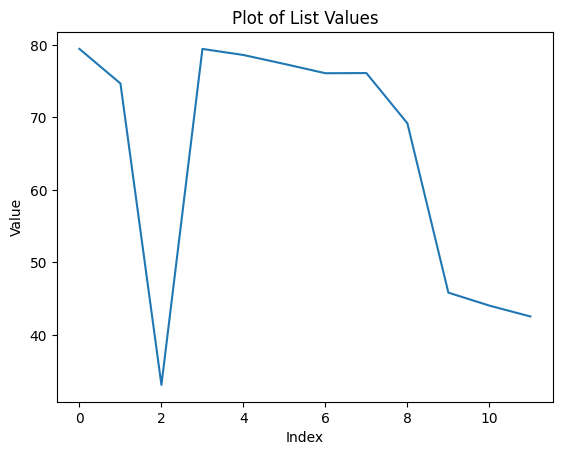

In [ ]:
import matplotlib.pyplot as plt

# Example list of values
values = test_acc_list

# Generate x-axis values (indices of the list)
x = range(len(values))

# Plot the values
plt.plot(x, values)

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of List Values')

# Show the plot
plt.show()


With ten layers, the accuracy is 33%, but there may be some errors during training.

Except that this accuracy starts at 79% and ends at 44%.

# Task 4

In [ ]:
import random

def delete_heads(p):

  N = int(p * 144)  # Desired overall number of values

  my_dict = {}

  # Generate at least one value for each key
  for i in range(11):
      my_dict[i] = [i]
      N -= 1

  # Generate additional values until N is reached
  while N > 0:
      key = random.choice(list(my_dict.keys()))
      if len(my_dict[key]) < 12:
          new_value = random.randint(0, 11)
          if new_value not in my_dict[key]:
              my_dict[key].append(new_value)
              N -= 1

  # Sort the dictionary by keys
  sorted_dict = dict(sorted(my_dict.items()))

  # Sort the values within each key
  for key in sorted_dict:
      sorted_dict[key] = np.sort(sorted_dict[key])

  return sorted_dict


50%

In [ ]:
model, optimizer = model_optimizer(model_name)
p50 = delete_heads(0.5)
model.bert.prune_heads(p50)

In [ ]:
p50 = delete_heads(0.5)
p50

{0: array([ 0,  3,  4,  5,  6,  9, 10]),
 1: array([ 0,  1,  2,  4,  6,  7,  8,  9, 10, 11]),
 2: array([0, 2, 4, 5, 6, 7, 8, 9]),
 3: array([2, 3, 5, 8, 9]),
 4: array([2, 4, 5, 6, 7, 8]),
 5: array([ 1,  5, 10]),
 6: array([0, 2, 3, 5, 6, 8]),
 7: array([ 0,  1,  2,  4,  7,  8,  9, 11]),
 8: array([ 0,  2,  3,  6,  8,  9, 10]),
 9: array([ 0,  4,  6,  7,  9, 11]),
 10: array([ 5,  7,  8,  9, 10, 11])}

In [ ]:
train(model, train_loader, valid_loader, optimizer, ep=3)

Epoch 1:
 train_loss: 1.00  val_loss: 0.79 
 train_acc : 45.5  val_acc : 59.9 

Epoch 2:
 train_loss: 0.65  val_loss: 0.69 
 train_acc : 70.0  val_acc : 71.6 

Epoch 3:
 train_loss: 0.40  val_loss: 0.72 
 train_acc : 83.1  val_acc : 73.1 



In [ ]:
test_acc_50 = test()

Test Set Accuracy: % 73.3


67%

In [ ]:
model, optimizer = model_optimizer(model_name)
p67 = delete_heads(1-0.67)
model.bert.prune_heads(p67)

In [ ]:
p67 = delete_heads(1-0.67)
p67


{0: array([ 0,  1,  2,  4,  6, 10]),
 1: array([ 1,  4,  7,  8,  9, 10]),
 2: array([2, 4, 5, 6]),
 3: array([2, 3, 5, 8]),
 4: array([ 0,  4, 10]),
 5: array([ 0,  2,  3,  4,  5,  7,  9, 10]),
 6: array([ 0,  1,  4,  6, 10]),
 7: array([ 2,  7,  9, 11]),
 8: array([5, 8]),
 9: array([ 9, 11]),
 10: array([ 2,  9, 10])}

In [ ]:
train(model, train_loader, valid_loader, optimizer, ep=3)

Epoch 1:
 train_loss: 0.87  val_loss: 0.59 
 train_acc : 57.0  val_acc : 75.8 

Epoch 2:
 train_loss: 0.45  val_loss: 0.53 
 train_acc : 81.4  val_acc : 79.1 

Epoch 3:
 train_loss: 0.25  val_loss: 0.64 
 train_acc : 90.8  val_acc : 77.2 



In [ ]:
test_acc_67 = test()

Test Set Accuracy: % 80.1


83%

In [ ]:
model, optimizer = model_optimizer(model_name)
p83 = delete_heads(1-0.83)
model.bert.prune_heads(p83)

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassifica

In [ ]:
p83 = delete_heads(1-0.83)
p83

{0: array([0, 7]),
 1: array([ 1,  8, 10]),
 2: array([1, 2, 6]),
 3: array([3]),
 4: array([4]),
 5: array([5]),
 6: array([0, 2, 6]),
 7: array([ 2,  7,  9, 11]),
 8: array([8]),
 9: array([1, 9]),
 10: array([ 0,  2, 10])}

In [ ]:
train(model, train_loader, valid_loader, optimizer, ep=3)

Epoch 1:
 train_loss: 0.76  val_loss: 0.55 
 train_acc : 65.2  val_acc : 77.8 

Epoch 2:
 train_loss: 0.39  val_loss: 0.54 
 train_acc : 84.6  val_acc : 77.7 

Epoch 3:
 train_loss: 0.21  val_loss: 0.64 
 train_acc : 92.3  val_acc : 79.4 



In [ ]:
test_acc_83 = test()

Test Set Accuracy: % 80.9


# Task 5

In [23]:
def test2(model, test_loader): 
    
    # model = torch.load('/content/drive/MyDrive/data/model/model5.pth')
    model.eval()
     
    total_test_acc = 0 
    total_test_loss = 0
    p = []
 
    with torch.no_grad():
        for batch_idx, (pair_token_ids, mask_ids, y) in enumerate(test_loader):
                optimizer.zero_grad()
                pair_token_ids = pair_token_ids.to(device)
                mask_ids = mask_ids.to(device)
                labels = y.to(device)

                loss, prediction = model(pair_token_ids, attention_mask=mask_ids, labels=labels).values()
                p += (torch.log_softmax(torch.tensor(prediction), dim=1).argmax(dim=1)).to('cpu')
                

                acc = calc_acc(prediction, labels)

                total_test_loss += loss.item()
                total_test_acc  += acc.item()

    test_acc  = 100*total_test_acc/len(test_loader)
    test_loss = total_test_loss/len(test_loader) 
 
    print(f'Test Set Accuracy: % {test_acc:.1f}')
    return test_acc, p

In [24]:
test_acc, p = test2(model12, test_loader)

<ipython-input-23-4dc20f9152d1>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p += (torch.log_softmax(torch.tensor(prediction), dim=1).argmax(dim=1)).to('cpu')


Test Set Accuracy: % 80.5


In [30]:
label_dict = {0: 'e', 1: 'c', 2: 'n'}
test_data['p'] = list(map(lambda t: label_dict[t.item()], p))

In [31]:
_ = [print(f"premise: {data_point['premise']}\nHypothesis: {data_point['hypothesis']}\nLabel: {data_point['label']}\nPrediction: {data_point['p']}\n") for index, data_point in test_data.loc[test_data['label'] != test_data['p']].iterrows()]


Streaming output truncated to the last 5000 lines.
premise: هنگامی که رسول خدا از جنگ تبوک بازگشت سعد انصاری به استقبال آن حضرت شتافت. پیامبر پرسید:چرا دست هایت این چنین کوفته و خشن است؟ سعد گفت: با بیل و طناب کار می کنم و هزینه خانواده ام را تأمین می کنم، پیامبر دست او را بوسید و فرمود: این دستی است که آتش جهنم به آن نخواهد رسید.
Hypothesis: پیامبر (ص) پس از بازگشت از غروه تبوک بر دست سعد انصاری بوسه زد.
Label: e
Prediction: n

premise: هنگامی که رسول خدا از جنگ تبوک بازگشت سعد انصاری به استقبال آن حضرت شتافت. پیامبر پرسید:چرا دست هایت این چنین کوفته و خشن است؟ سعد گفت: با بیل و طناب کار می کنم و هزینه خانواده ام را تأمین می کنم، پیامبر دست او را بوسید و فرمود: این دستی است که آتش جهنم به آن نخواهد رسید.
Hypothesis: پیامبر صلّی الله علیه و آله پس از بازگشت از نبرد تبوک دست مقداد را بوسید.
Label: c
Prediction: n

premise: هنگامی که رسول خدا از جنگ تبوک بازگشت سعد انصاری به استقبال آن حضرت شتافت. پیامبر پرسید:چرا دست هایت این چنین کوفته و خشن است؟ سعد گفت: با بیل و طناب کار می کنم و هزی